# Demographic Segmentation

## Importing Required Libraries

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd

## Load Datasets

In [183]:
raw_data = pd.read_csv("EV_Dataset.csv")
raw_data.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [32]:
df = raw_data.copy()
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


### Data Cleaning

In [33]:
df["Year"] = df["Year"].astype(int)
df["Month_Name"] = df["Month_Name"].str.capitalize()
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

In [34]:
df = df.drop_duplicates()
df = df[df["EV_Sales_Quantity"] > 0] 

In [38]:
print(df.head())

     Year Month_Name       Date           State    Vehicle_Class  \
13   2014        Jan 2014-01-01  Andhra Pradesh  M-CYCLE/SCOOTER   
102  2014        Jan 2014-01-01    Chhattisgarh  M-CYCLE/SCOOTER   
153  2014        Jan 2014-01-01           Delhi  M-CYCLE/SCOOTER   
157  2014        Jan 2014-01-01           Delhi        MOTOR CAR   
173  2014        Jan 2014-01-01             Goa        MOTOR CAR   

    Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
13        2-Wheelers  2W_Personal                1.0  
102       2-Wheelers  2W_Personal               10.0  
153       2-Wheelers  2W_Personal                2.0  
157       4-Wheelers  4W_Personal                5.0  
173       4-Wheelers  4W_Personal                1.0  


### Data Preprocessing

In [37]:
df.describe()

,Year,Date,EV_Sales_Quantity
count,14062.000000,14062,14062.000000
mean,2020.166619,2020-08-18 11:44:01.501920,255.568980
min,2014.000000,2014-01-01 00:00:00,1.000000
25%,2018.000000,2018-11-01 00:00:00,2.000000
50%,2021.000000,2021-04-01 00:00:00,12.000000
75%,2022.000000,2022-11-01 00:00:00,82.000000
max,2024.000000,2024-01-01 00:00:00,20584.000000
std,2.554917,NaN,1107.675407


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14062 entries, 13 to 96841
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               14062 non-null  int64         
 1   Month_Name         14062 non-null  object        
 2   Date               14062 non-null  datetime64[ns]
 3   State              14062 non-null  object        
 4   Vehicle_Class      14062 non-null  object        
 5   Vehicle_Category   14062 non-null  object        
 6   Vehicle_Type       14062 non-null  object        
 7   EV_Sales_Quantity  14062 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 988.7+ KB


In [179]:
df_pivot = df.pivot_table(index=["State", "Vehicle_Class", "Vehicle_Category", "Vehicle_Type"], 
                           columns="Year", values="EV_Sales_Quantity", aggfunc="sum").reset_index()
df_pivot.index = df_pivot.index + 1
df_pivot.rename_axis("Sl.No.", inplace=True)
df_pivot.head()

Year,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Sl.No.,,,,,,,,,,,,,,,
1,Andaman & Nicobar Island,BUS,Bus,Bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN
2,Andaman & Nicobar Island,E-RICKSHAW WITH CART (G),3-Wheelers,3W_Goods_LowSpeed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN
3,Andaman & Nicobar Island,E-RICKSHAW(P),3-Wheelers,3W_Shared_LowSpeed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,Andaman & Nicobar Island,GOODS CARRIER,Others,Others,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,Andaman & Nicobar Island,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.0,2.0


In [116]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 1 to 482
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             482 non-null    object 
 1   Vehicle_Class     482 non-null    object 
 2   Vehicle_Category  482 non-null    object 
 3   Vehicle_Type      482 non-null    object 
 4   2014              95 non-null     float64
 5   2015              124 non-null    float64
 6   2016              151 non-null    float64
 7   2017              178 non-null    float64
 8   2018              230 non-null    float64
 9   2019              231 non-null    float64
 10  2020              214 non-null    float64
 11  2021              263 non-null    float64
 12  2022              316 non-null    float64
 13  2023              348 non-null    float64
 14  2024              250 non-null    float64
dtypes: float64(11), object(4)
memory usage: 56.6+ KB


In [117]:
df_pivot.isnull().sum()

Year
State                 0
Vehicle_Class         0
Vehicle_Category      0
Vehicle_Type          0
2014                387
2015                358
2016                331
2017                304
2018                252
2019                251
2020                268
2021                219
2022                166
2023                134
2024                232
dtype: int64

In [118]:
df_pivot.fillna(0,inplace=True)
df_pivot.isnull().sum()

Year
State               0
Vehicle_Class       0
Vehicle_Category    0
Vehicle_Type        0
2014                0
2015                0
2016                0
2017                0
2018                0
2019                0
2020                0
2021                0
2022                0
2023                0
2024                0
dtype: int64

In [180]:
df_pivot.head()

Year,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Sl.No.,,,,,,,,,,,,,,,
1,Andaman & Nicobar Island,BUS,Bus,Bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN
2,Andaman & Nicobar Island,E-RICKSHAW WITH CART (G),3-Wheelers,3W_Goods_LowSpeed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN
3,Andaman & Nicobar Island,E-RICKSHAW(P),3-Wheelers,3W_Shared_LowSpeed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,Andaman & Nicobar Island,GOODS CARRIER,Others,Others,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,Andaman & Nicobar Island,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.0,2.0


## Analysis of State-wise Data

### Total EV Sales per Year

In [120]:
total_ev_sales_per_year = df_pivot.iloc[:, 4:].sum()
total_ev_sales_per_year

Year
2014       2392.0
2015       7805.0
2016      49855.0
2017      87420.0
2018     130254.0
2019     166819.0
2020     124684.0
2021     331498.0
2022    1024723.0
2023    1525179.0
2024     143182.0
dtype: float64

### Year-on-Year Growth in EV Sales(Percentage)

In [108]:
growth_rates = {}
for i in range(len(total_ev_sales_per_year) - 1):
    prev_year, current_year = total_ev_sales_per_year.index[i], total_ev_sales_per_year.index[i + 1]
    growth_rates[f"Growth_{prev_year}_{current_year}"] = ((total_ev_sales_per_year[current_year] - total_ev_sales_per_year[prev_year]) / total_ev_sales_per_year[prev_year]) * 100

### State-Wise Average Sales

In [126]:
for year, growth in growth_rates.items():
    print(f"{year}: {growth:.2f}%")

Growth_2014_2015: 226.30%
Growth_2015_2016: 538.76%
Growth_2016_2017: 75.35%
Growth_2017_2018: 49.00%
Growth_2018_2019: 28.07%
Growth_2019_2020: -25.26%
Growth_2020_2021: 165.87%
Growth_2021_2022: 209.12%
Growth_2022_2023: 48.84%
Growth_2023_2024: -90.61%


### Add a column for State-Wise Average Sales

In [181]:
year_columns = df_pivot.columns[4:]
df_pivot["State_Wise_Avg_Sales"] = df_pivot[year_columns].mean(axis=1)
df_pivot.head()

Year,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,State_Wise_Avg_Sales
Sl.No.,,,,,,,,,,,,,,,,
1,Andaman & Nicobar Island,BUS,Bus,Bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,40.000000
2,Andaman & Nicobar Island,E-RICKSHAW WITH CART (G),3-Wheelers,3W_Goods_LowSpeed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,29.000000
3,Andaman & Nicobar Island,E-RICKSHAW(P),3-Wheelers,3W_Shared_LowSpeed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.000000
4,Andaman & Nicobar Island,GOODS CARRIER,Others,Others,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000
5,Andaman & Nicobar Island,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.0,2.0,3.333333


# Data Visualization

### Largest State

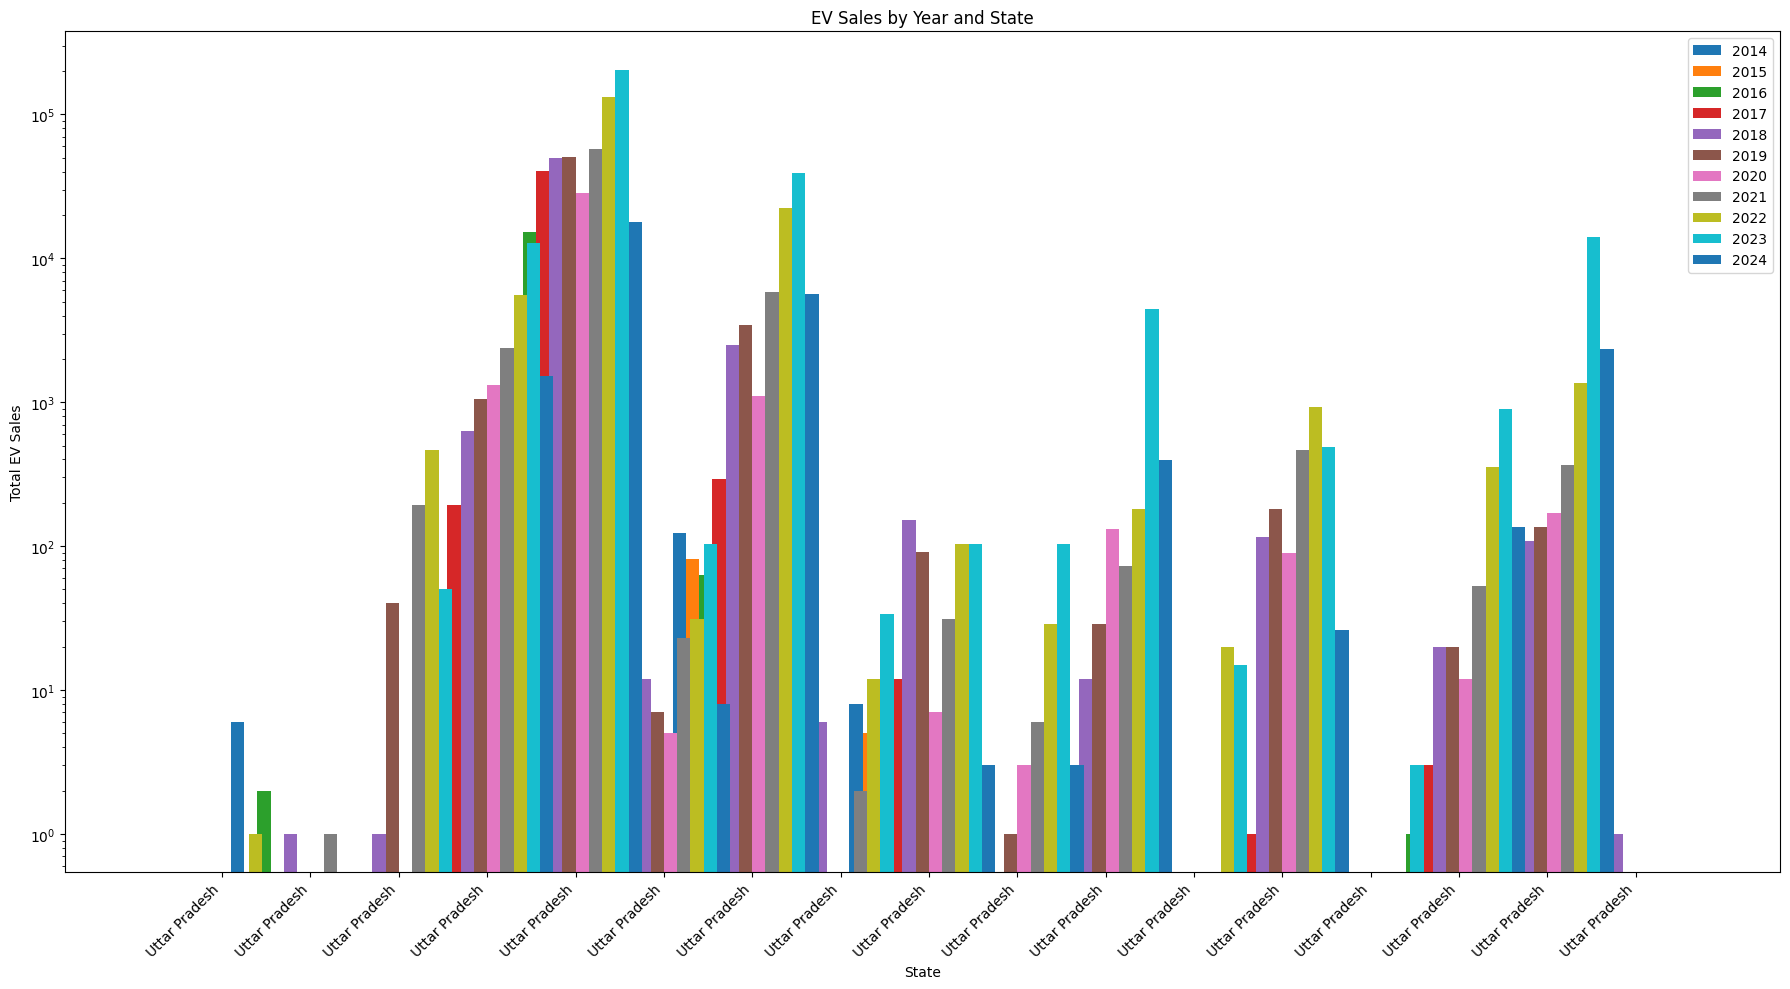

In [150]:
largest_state = df_pivot.groupby("State")[years].sum().sum(axis=1).nlargest(1).index
df_pivot_filtered = df_pivot[df_pivot["State"].isin(largest_state)]

fig, ax = plt.subplots(figsize=(18, 10))
width = 0.15  
x = np.arange(len(df_pivot_filtered['State']))  

for i, year in enumerate(years):
    ax.bar(x + (i - len(years)/2) * width, df_pivot_filtered[year], width, label=str(year))

ax.set_ylabel('Total EV Sales')
ax.set_xlabel('State')
ax.set_title('EV Sales by Year and State')
ax.set_xticks(x)
ax.set_xticklabels(df_pivot_filtered['State'], rotation=45, ha="right") 
ax.legend()

ax.set_yscale("log")  

plt.tight_layout()
plt.show()

### Smallest State

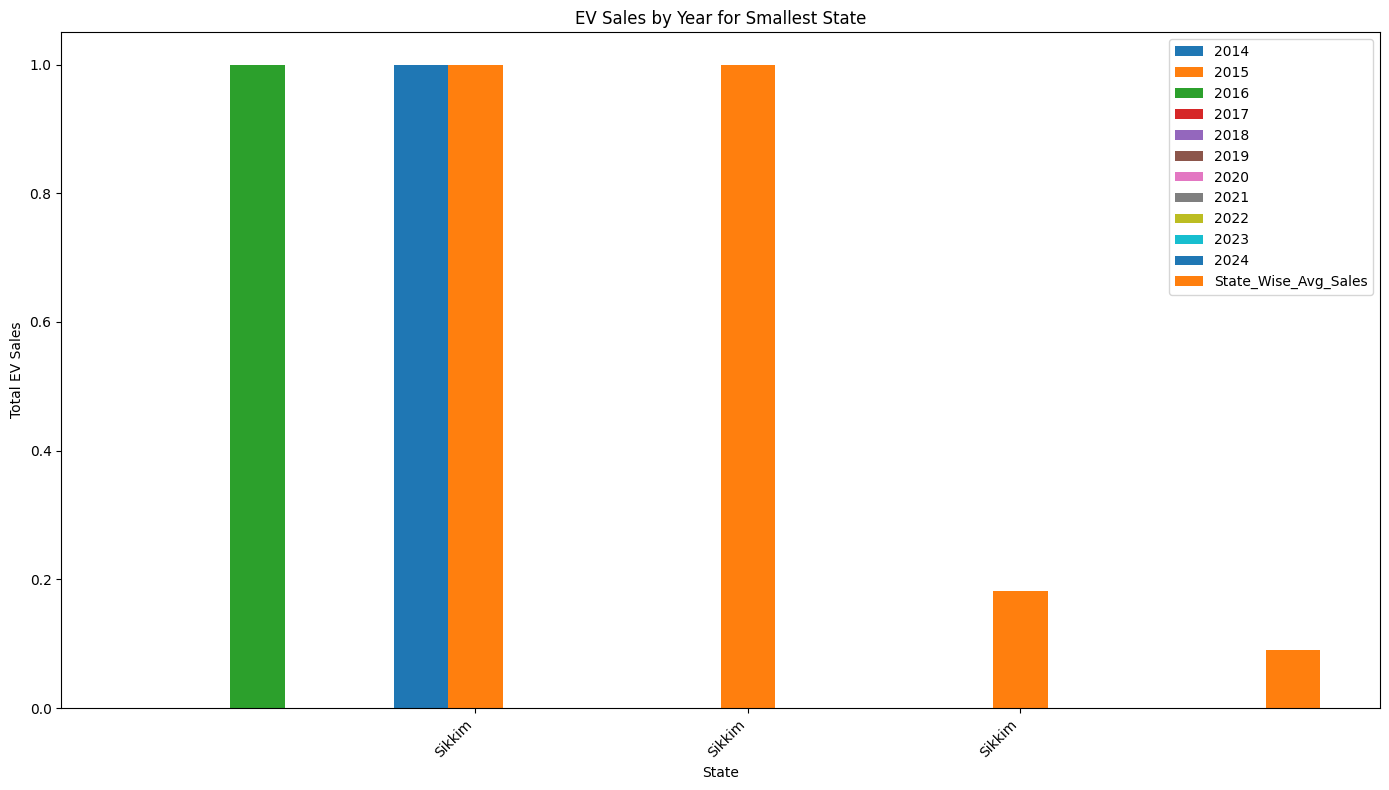

In [149]:
smallest_state = df_pivot.groupby("State")[year_columns].sum().sum(axis=1).nsmallest(1).index
df_pivot_filtered = df_pivot[df_pivot["State"].isin(smallest_state)]

fig, ax = plt.subplots(figsize=(14, 8))
width = 0.2  
x = np.arange(len(df_pivot_filtered['State'])) 

for i, year in enumerate(year_columns):
    ax.bar(x + (i - len(year_columns)/2) * width, df_pivot_filtered[year], width, label=str(year))

ax.set_ylabel('Total EV Sales')
ax.set_xlabel('State')
ax.set_title('EV Sales by Year for Smallest State')
ax.set_xticks(x)
ax.set_xticklabels(df_pivot_filtered['State'], rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

# EV Sales Per Year

In [153]:
df["Financial_Year"] = df["Year"].astype(str) + "-" + (df["Year"] + 1).astype(str)
df_financial = df.groupby(["Vehicle_Class", "Financial_Year"])['EV_Sales_Quantity'].sum().reset_index()
df_financial.head()

,Vehicle_Class,Financial_Year,EV_Sales_Quantity
0,ADAPTED VEHICLE,2015-2016,3.0
1,ADAPTED VEHICLE,2016-2017,4.0
2,ADAPTED VEHICLE,2017-2018,1.0
3,ADAPTED VEHICLE,2018-2019,7.0
4,ADAPTED VEHICLE,2019-2020,29.0


## Data Visualization

### Top 5 Vehicles

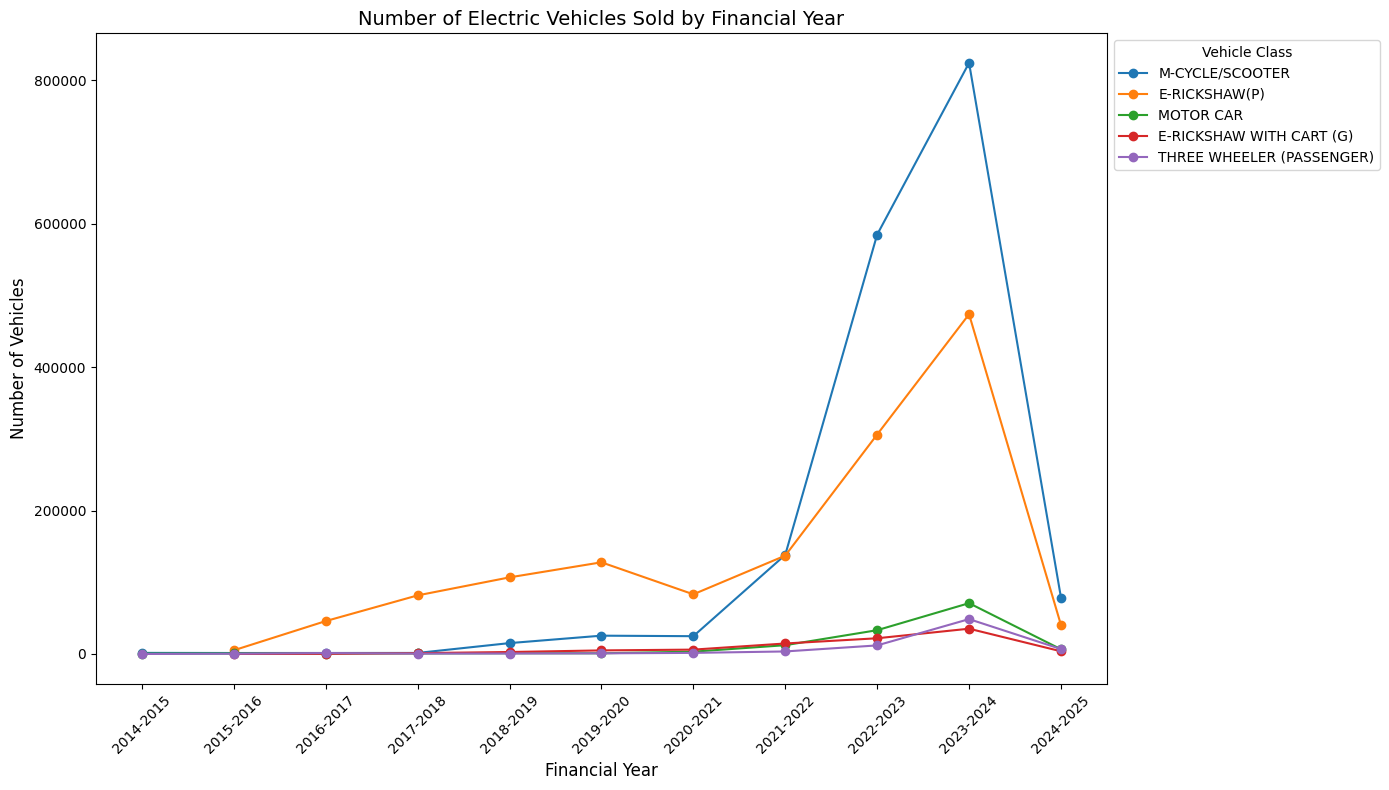

In [176]:
plt.figure(figsize=(14, 8))
categories = df_financial['Vehicle_Class'].unique()

top_categories = df_financial.groupby("Vehicle_Class")["EV_Sales_Quantity"].sum().nlargest(5).index

for category in top_categories:
    subset = df_financial[df_financial['Vehicle_Class'] == category]
    plt.plot(subset['Financial_Year'], subset['EV_Sales_Quantity'], marker='o', linestyle='-', label=category)

plt.title('Number of Electric Vehicles Sold by Financial Year', fontsize=14)
plt.xlabel('Financial Year', fontsize=12)
plt.ylabel('Number of Vehicles', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Vehicle Class")  

plt.tight_layout()
plt.show()

# Two Wheeler Sales Per Year

In [173]:
df_2wheeler = df[df["Vehicle_Category"].str.contains("2-Wheelers", case=False, na=False)]
df_2wheeler = df_2wheeler.groupby(["Vehicle_Category", "Financial_Year", "Month_Name"])['EV_Sales_Quantity'].sum().reset_index()
df_2wheeler.head()

,Vehicle_Category,Financial_Year,Month_Name,EV_Sales_Quantity
0,2-Wheelers,2014-2015,Apr,192.0
1,2-Wheelers,2014-2015,Aug,111.0
2,2-Wheelers,2014-2015,Dec,166.0
3,2-Wheelers,2014-2015,Feb,130.0
4,2-Wheelers,2014-2015,Jan,174.0


## Data Visualization

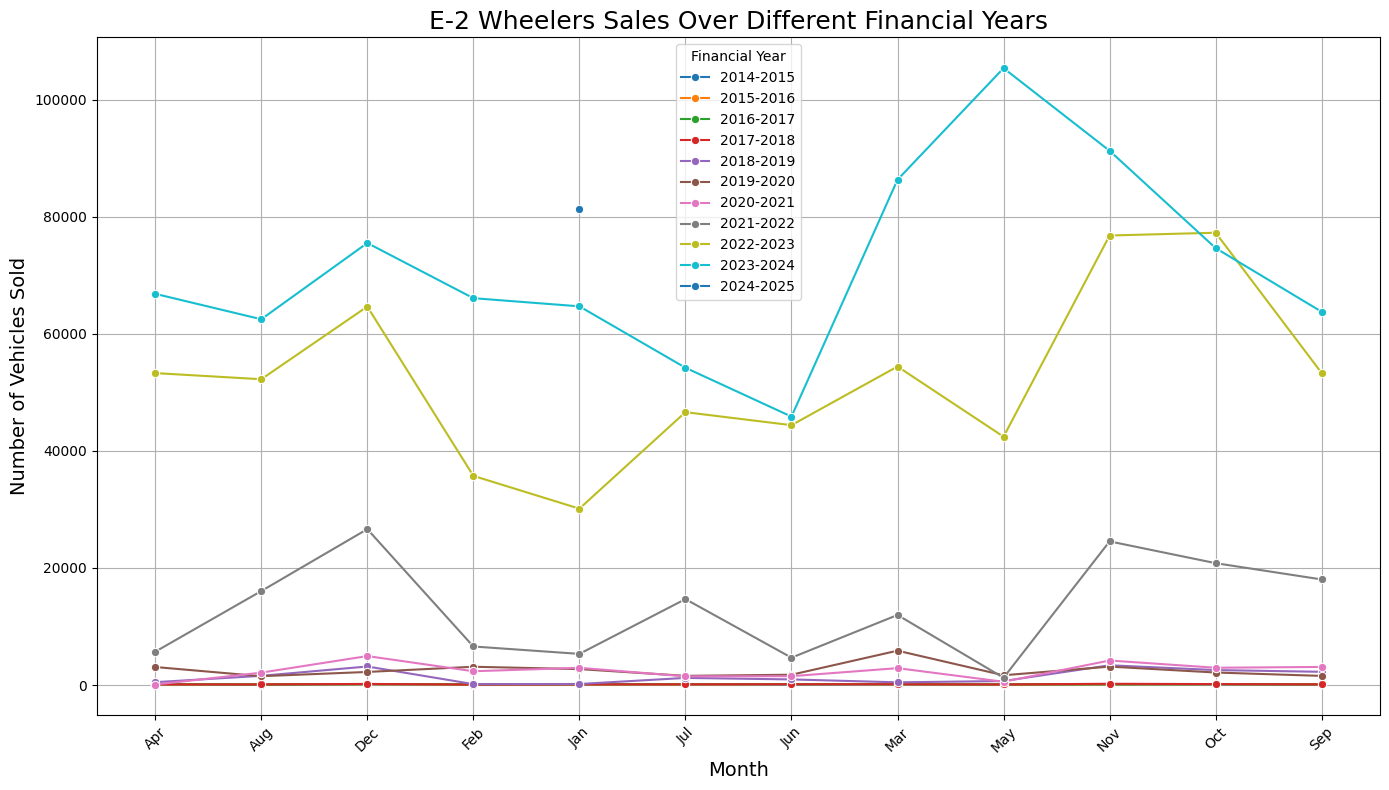

In [178]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Month_Name', y='EV_Sales_Quantity', hue='Financial_Year', data=df_2wheeler, marker='o', palette='tab10')

# Customize the plot
plt.title('E-2 Wheelers Sales Over Different Financial Years', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Vehicles Sold', fontsize=14)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Financial Year')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()